# Predicting Stock Prices with Linear Regression

In [1]:
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

In [39]:
# Set start and end date for stock prices
start_date = datetime.date(2009, 3,8)
end_date = datetime.date.today()



data = pd.read_csv('sap_stock.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
0,2009-03-09,25.16,25.82,24.48,25.59,NaN,5749357.0,145200289.0,NaN,NaN,NaN
1,2009-03-10,25.68,26.95,25.68,26.87,NaN,7507770.0,198480965.0,NaN,NaN,NaN
2,2009-03-11,26.50,26.95,26.26,26.64,NaN,5855095.0,155815439.0,NaN,NaN,NaN
3,2009-03-12,26.15,26.47,25.82,26.18,NaN,6294955.0,164489409.0,NaN,NaN,NaN
4,2009-03-13,26.01,26.24,25.65,25.73,NaN,6814568.0,176228331.0,NaN,NaN,NaN


In [4]:
# Check data types in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   2550 non-null   object 
 1   Open                   2242 non-null   float64
 2   High                   2543 non-null   float64
 3   Low                    2543 non-null   float64
 4   Close                  2550 non-null   float64
 5   Change                 11 non-null     float64
 6   Traded Volume          2504 non-null   float64
 7   Turnover               2497 non-null   float64
 8   Last Price of the Day  0 non-null      float64
 9   Daily Traded Units     0 non-null      float64
 10  Daily Turnover         7 non-null      float64
dtypes: float64(10), object(1)
memory usage: 219.3+ KB


In [5]:
data = data.drop(['Change','Last Price of the Day','Daily Traded Units','Daily Turnover'], axis=1)
data.describe()

,Open,High,Low,Close,Traded Volume,Turnover
count,2242.000000,2543.000000,2543.000000,2550.000000,2.504000e+03,2.497000e+03
mean,56.686896,61.563225,60.535073,60.995955,3.296818e+06,1.828440e+08
std,18.320821,21.184135,20.934460,21.097480,2.004323e+06,9.350710e+07
min,25.160000,25.820000,24.480000,25.590000,0.000000e+00,1.767350e+05
25%,41.500000,43.430000,42.590000,42.950000,2.131686e+06,1.300462e+08
50%,56.560000,58.480000,57.580000,58.015000,2.852772e+06,1.626544e+08
75%,67.732500,78.365000,77.085000,77.762500,3.878528e+06,2.104511e+08
max,100.100000,108.520000,107.020000,107.800000,3.645671e+07,1.369431e+09


In [6]:
# Display features in data set
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Traded Volume', 'Turnover'], dtype='object')

### Select Subset with relevant features

We use the daily closing price **Close** as the value to predict, so we can discard the other features.  

* 'Close' column has numerical data type
* The 'Date' is the index column and contains datetime values

In [7]:
# Create a new DataFrame with only closing price and date
df = data[['Close','Date']]



# Reset index column so that we have integers to represent time for later analysis
df = df.reset_index()

In [8]:
df.head()

,index,Close,Date
0,0,25.59,2009-03-09
1,1,26.87,2009-03-10
2,2,26.64,2009-03-11
3,3,26.18,2009-03-12
4,4,25.73,2009-03-13


In [9]:
# Check data types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   2550 non-null   int64  
 1   Close   2550 non-null   float64
 2   Date    2550 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 59.9+ KB


In [10]:
# Check for missing values in the columns
df.isnull().values.any()

False

## Explore the Data

When we take a look at the price movement over time by simply plotting the *Closing price* vs *Time*, we can already see, that the price continously increases over time and we can also estimate that trend could be linear.

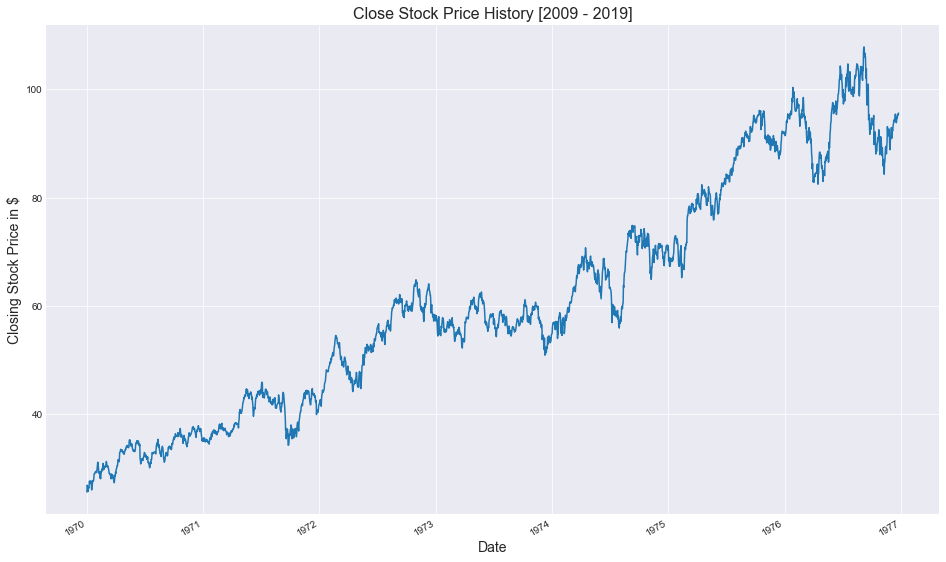

In [19]:
# Import matplotlib package for date plots
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Close Stock Price History [2009 - 2019]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [20]:

from sklearn.model_selection import train_test_split

In [21]:

train, test = train_test_split(df, test_size=0.20)

### Create and Train the Model

In [22]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

In [25]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [26]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

In [27]:
# The coefficient
print('Slope: ', model.coef_)
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  [0.02764425]
Intercept:  25.792482913866998


Interpreting the coefficients:

* The **slope** coefficient tells us that with a 1 unit increase in **date** the **closing price** increases by 0.0276 $
* The **intercept** coefficient is the price at wich the **closing price** measurement started, the stock price value at date zero

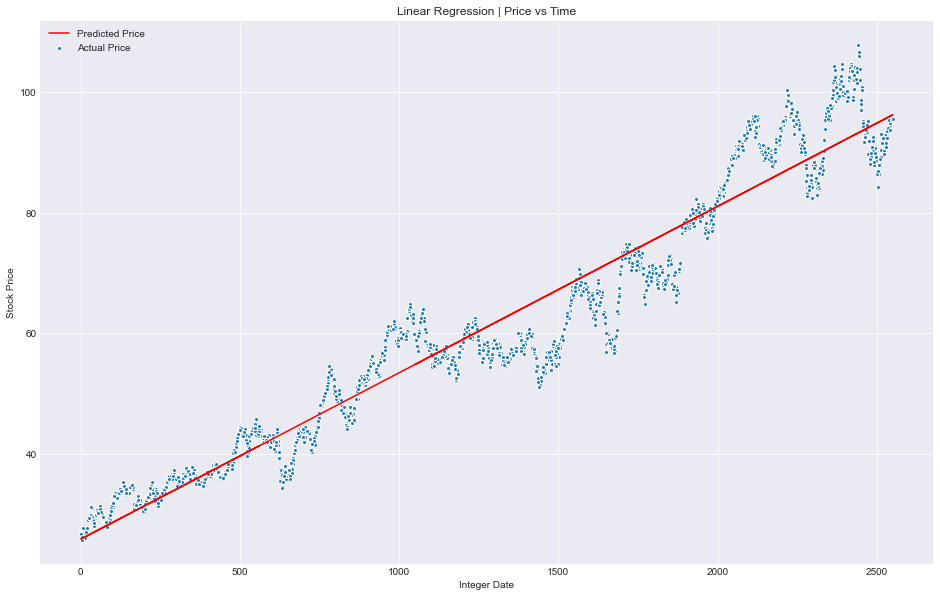

In [36]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [37]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [38]:
# Generate array with predicted values
y_pred = model.predict(X_test)

In [31]:
# Get number of rows in data set for random sample
df.shape

(2550, 3)

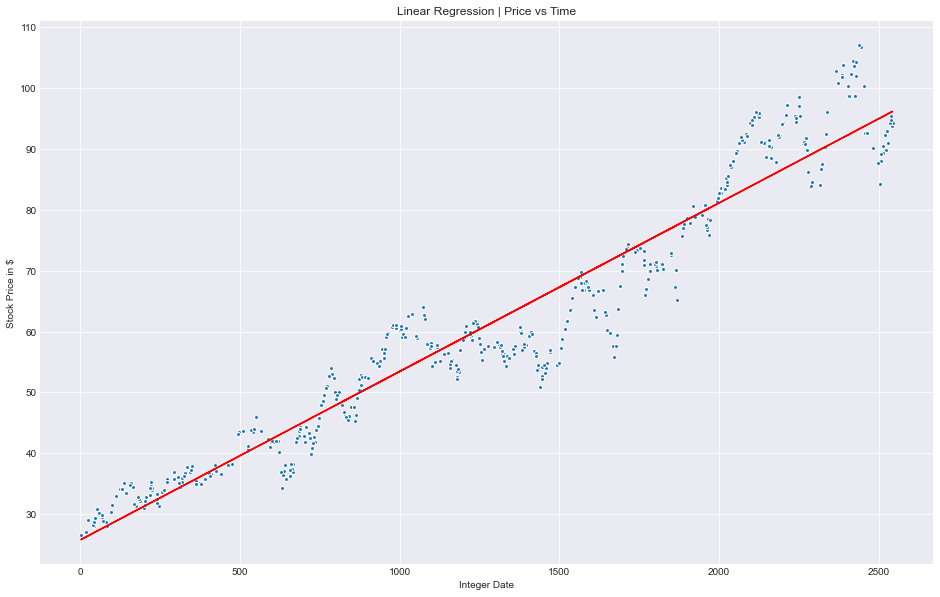

In [23]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price in $')

plt.show()

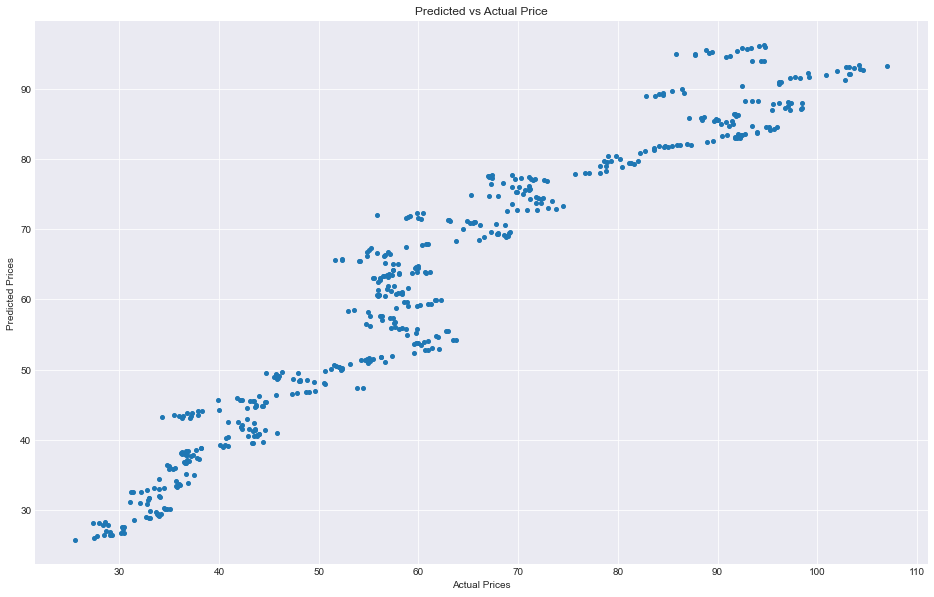

In [42]:
# Plot predicted vs actual prices
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')

plt.show()

The data points are mostly close to a diagonal, which indicates, that the predicted values are close to the actual value and the model's performance is largerly quite good.  
Yet there are some areas, around 55 to 65, the model seems to be quite random and shows no relationship between the predicted and actual value.  
Also in the area around 85 - 110 the data point are spread out quite heavily and the predictions don't cover the values above 100.

In [48]:
df.head()

,index,Close,Date
0,0,25.59,2009-03-09
1,1,26.87,2009-03-10
2,2,26.64,2009-03-11
3,3,26.18,2009-03-12
4,4,25.73,2009-03-13


In [44]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [45]:
# Statistical summary of test data
df['Close'].describe()

count    2550.000000
mean       60.995955
std        21.097480
min        25.590000
25%        42.950000
50%        58.015000
75%        77.762500
max       107.800000
Name: Close, dtype: float64

In [46]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.345220420737505
Mean Squared Error: 30.08579181829368
Root Mean Squared Error: 5.485051669610203


In [47]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.9305669919655529


The value of $R^2$ shows that are model accounts for nearly 94% of the differences between the actual stock prices and the predicted prices. 